In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%store -r covid_df

display(covid_df)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


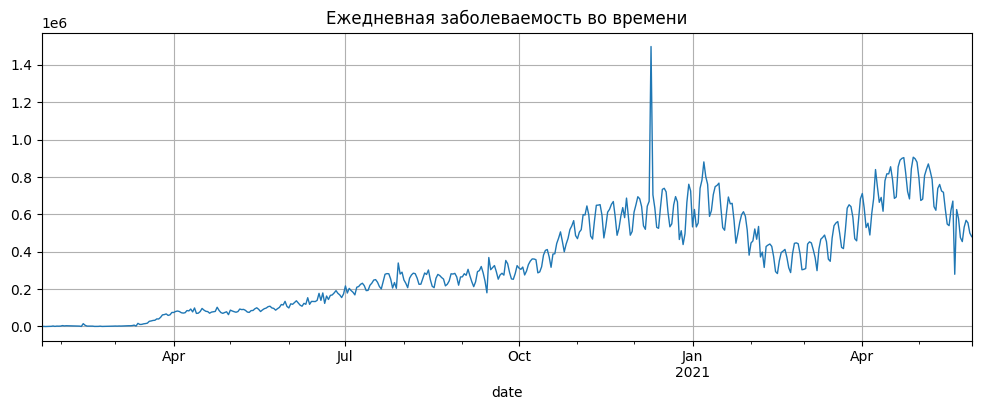

In [8]:
# Давайте попрактикуемся в использовании метода plot().

# Начнём с исследования заболеваемости коронавирусом во всём мире.
# Для этого первым делом отобразим,
# как менялось ежедневное число заболевших (daily_confirmed) во всём мире во времени.
# Далее сгруппируем таблицу по датам 
# и подсчитаем суммарное число зафиксированных случаев по дням.

# Теперь мы наконец можем построить график с помощью метода plot().
# Будем использовать линейный график размером 12x4 
# (попробуйте взять другие числа, чтобы увидеть разницу). 
# Подпишем график и отобразим сетку. 
# Параметр lw (line width) отвечает за ширину линии для линейного графика.

grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=1
);

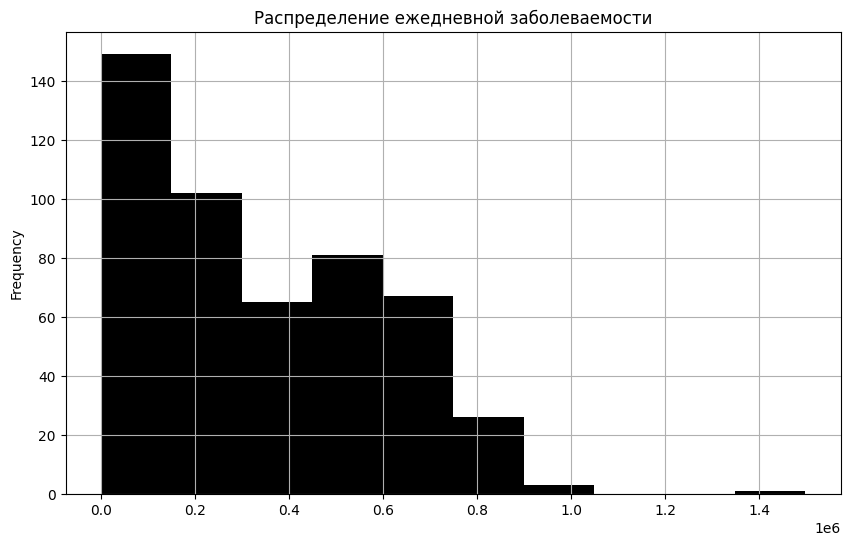

In [17]:
# Теперь построим гистограмму, 
# которая покажет распределение ежедневной заболеваемости во всём мире.
# Для этого параметр kind выставляем на значение 'hist'. 
# Параметр bins (корзины) отвечает за число прямоугольников в гистограмме
# — пусть их будет 10 (попробуйте использовать другие числа, чтобы увидеть разницу).

grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10

);

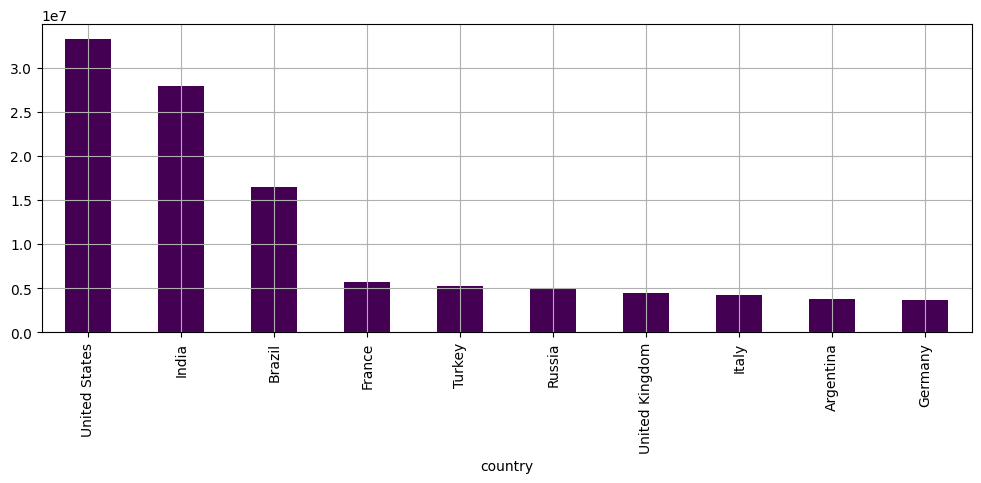

In [14]:
# Давайте построим столбчатую диаграмму, 
# которая покажет ТОП-10 стран по суммарной заболеваемости.

# Для этого сгруппируем данные по странам
# и вычислим последний зафиксированный показатель с помощью агрегирующего метода last()
# — он возвращает последнее значение в столбце DataFrame.

# Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'.
# Параметр colormap отвечает за цветовую гамму графика.

grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='viridis'
);

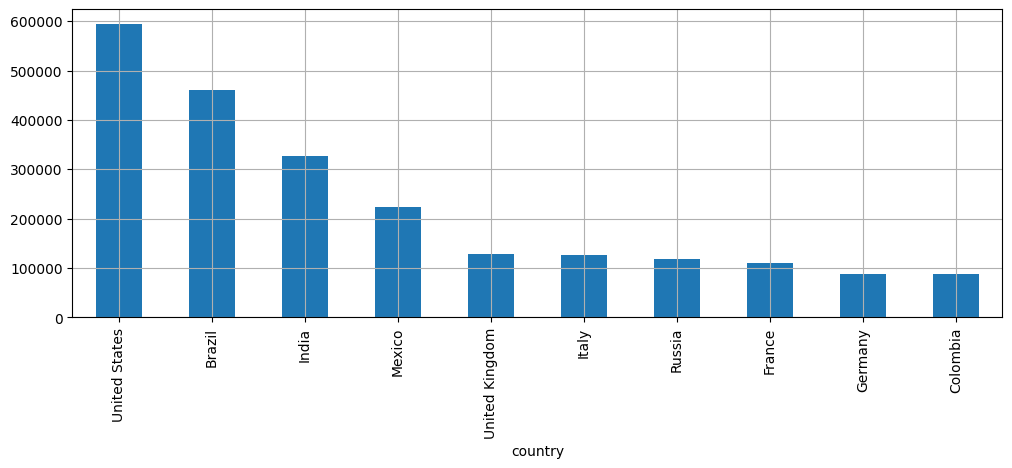

In [20]:
# А теперь посмотрим, как в этих десяти странах соотносится
# количество заболевших и умерших от вируса. 
# Для этого отобразим сразу два показателя на столбчатой диаграмме: 

grouped_country = covid_df.groupby(['country'])['deaths'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(     kind='bar',     grid=True,     figsize=(12, 4), );

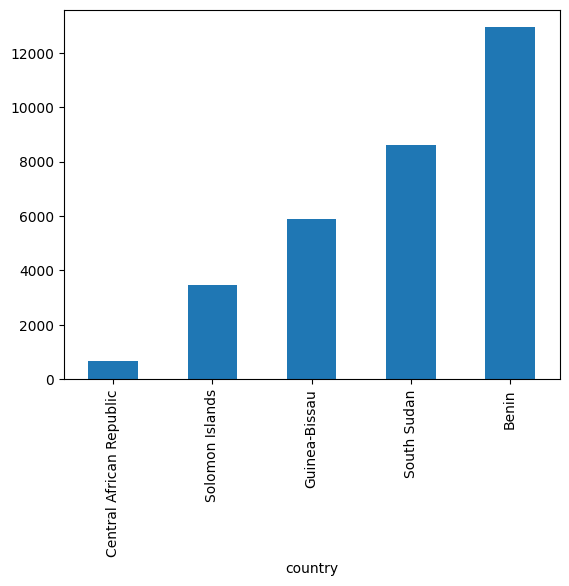

In [21]:
# Постройте график из задания 4.4. 
# В какой стране число вакцинированных наименьшее?

covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');